<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [286]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DBNAME = '*****'
USER = '*****'
PASSWORD = '*****'
HOST = '***.***.***.***'
PORT = 0000

In [261]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = f'''SELECT
                    COUNT(vacancies.id) AS vac_am
                FROM
                    public.vacancies AS vacancies            
'''

In [5]:
vac_am = pd.read_sql_query(query_3_1, connection)
display(vac_am)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,vac_am
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
query_3_2 = f'''SELECT
	                COUNT(employers.id) AS empl_am
                FROM
                    public.employers AS employers
'''

In [7]:
empl_am = pd.read_sql_query(query_3_2, connection)
display(empl_am)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,empl_am
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
query_3_3 = f'''SELECT
	                COUNT(areas.id) AS ars_am
                FROM
                    public.areas AS areas
'''

In [9]:
ars_am = pd.read_sql_query(query_3_3, connection)
display(ars_am)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ars_am
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
query_3_4 = f'''SELECT
	                COUNT(industries.id) AS ind_am
                FROM
                    public.industries AS industries
'''

In [11]:
ind_am = pd.read_sql_query(query_3_4, connection)
display(ind_am)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ind_am
0,294


***

>выводы по предварительному анализу данных

В базе содержится сведения о почти 50 тыс. вакансий, 23,5 тыс. работодателей, 1362 региона и 294 сферы деятельности.
Есть из чего повыбирать.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [12]:
query_4_1 = f'''SELECT
	                COUNT(vacancies.id) AS cnt,
                    areas.name AS area
                FROM
                    public.vacancies AS vacancies
                    LEFT JOIN
                        public.areas AS areas
                    ON vacancies.area_id = areas.id
                GROUP BY
                    areas.name
                ORDER BY
                    cnt DESC
'''

In [13]:
vac_area = pd.read_sql_query(query_4_1, connection)
vac_area.head(5)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [14]:
query_4_2 = f'''SELECT
	                COUNT(vacancies.id) AS cnt
                FROM
                    public.vacancies AS vacancies
                WHERE
                    vacancies.salary_from IS NOT NULL
                    OR vacancies.salary_to IS NOT NULL
'''

In [15]:
vac_sal = pd.read_sql_query(query_4_2, connection)
display(vac_sal)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [16]:
query_4_3 = f'''SELECT
	                ROUND(AVG(vacancies.salary_from)) AS MidMin,
	                ROUND(AVG(vacancies.salary_to)) AS MidMax
                FROM
                    public.vacancies AS vacancies
'''

In [17]:
sal_mid = pd.read_sql_query(query_4_3, connection)
display(sal_mid)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,midmin,midmax
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [18]:
query_4_4 = f'''SELECT
	                COUNT(vacancies.id) AS cnt,
                    vacancies.schedule AS schedule,
                    vacancies.employment AS employment
                FROM
                    public.vacancies AS vacancies
                GROUP BY
                    vacancies.schedule,
                    vacancies.employment
                ORDER BY
                    cnt DESC
'''

In [19]:
schdl_empl = pd.read_sql_query(query_4_4, connection)
display(schdl_empl)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt,schedule,employment
0,35367,Полный день,Полная занятость
1,7802,Удаленная работа,Полная занятость
2,1593,Гибкий график,Полная занятость
3,1312,Удаленная работа,Частичная занятость
4,940,Сменный график,Полная занятость
5,569,Полный день,Стажировка
6,367,Вахтовый метод,Полная занятость
7,347,Полный день,Частичная занятость
8,312,Гибкий график,Частичная занятость
9,141,Полный день,Проектная работа


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [20]:
query_4_5 = f'''SELECT
                    vacancies.experience AS experience
                FROM
                    public.vacancies AS vacancies
                WHERE
                    vacancies.experience IS NOT NULL
                GROUP BY
                    vacancies.experience
                ORDER BY
                    COUNT(vacancies.id)
'''

In [21]:
vac_exp = pd.read_sql_query(query_4_5, connection)
display(vac_exp)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,experience
0,Более 6 лет
1,Нет опыта
2,От 3 до 6 лет
3,От 1 года до 3 лет


***

> выводы по детальному анализу вакансий

Проще всего найти работу в крупном городе на полные день и занятость если у вас есть хотя бы год опыта и устроит вознаграждение в 90 тыс.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [22]:
query_5_1 = f'''(SELECT
                    employers.name AS empl
                FROM
                    public.vacancies AS vacancies
                    LEFT JOIN
                        public.employers AS employers
                    ON vacancies.employer_id = employers.id
                GROUP BY
                    employers.name
                ORDER BY
                    COUNT(vacancies.id) DESC
                LIMIT 1)
                
                UNION ALL
                
                (SELECT
                    employers.name
                FROM
                    public.vacancies AS vacancies
                    LEFT JOIN
                        public.employers AS employers
                    ON vacancies.employer_id = employers.id
                GROUP BY
                    employers.name
                ORDER BY
                    COUNT(vacancies.id) DESC
                LIMIT 1 OFFSET 4)
'''

In [23]:
empl_ff = pd.read_sql_query(query_5_1, connection)
display(empl_ff)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,empl
0,Яндекс
1,Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [24]:
query_5_2 = f'''SELECT
	                areas.name AS area,
	                COUNT(vacancies.id) AS vac_am,
	                COUNT(employers.id) AS empl_am
                FROM
	                public.areas AS areas
	                LEFT JOIN
		                public.vacancies AS vacancies
	                ON vacancies.area_id = areas.id
	                LEFT JOIN
		                public.employers AS employers
	                ON employers.area = areas.id
                GROUP BY
	                areas.name
                ORDER BY
	                vac_am,
	                empl_am DESC
'''

In [25]:
area_ve = pd.read_sql_query(query_5_2, connection)
display(area_ve)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,area,vac_am,empl_am
0,Россия,0,410
1,Казахстан,0,207
2,Московская область,0,75
3,Краснодарский край,0,19
4,Ростовская область,0,18
...,...,...,...
1357,Новосибирск,1149438,1149438
1358,Алматы,1364132,1364132
1359,Минск,2354880,2354880
1360,Санкт-Петербург,6320667,6320667


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [26]:
query_5_3 = f'''SELECT
					employers.name AS empl,
					COUNT(DISTINCT vacancies.area_id) AS area_am
				FROM
					public.vacancies AS vacancies
					LEFT JOIN
						public.employers AS employers
					ON vacancies.employer_id = employers.id
				GROUP BY
					employers.name
				ORDER BY
					area_am DESC
'''

In [27]:
empl_va = pd.read_sql_query(query_5_3, connection)
display(empl_va)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,empl,area_am
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [28]:
query_5_4 = f'''SELECT
					COUNT(employers.id) AS empl_am
				FROM
					public.employers AS employers
					LEFT JOIN
						employers_industries AS employers_industries
					ON employers.id = employers_industries.employer_id
				WHERE
					employers_industries.industry_id IS NULL
'''

In [29]:
empl_ind = pd.read_sql_query(query_5_4, connection)
display(empl_ind)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,empl_am
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [30]:
n = 4
query_5_5 = f'''SELECT
                    employers.name as employer,
    				COUNT(employers_industries.industry_id) AS ind_am
    			FROM
    				public.employers AS employers
    				LEFT JOIN
    					employers_industries AS employers_industries
    				ON employers.id = employers_industries.employer_id
    			GROUP BY
                    employers.name
                HAVING
                    COUNT(employers_industries.industry_id) = {n}
                ORDER BY
                    employer
                OFFSET 2 LIMIT 1
'''

In [31]:
empl_3 = pd.read_sql_query(query_5_5, connection)
display(empl_3)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,employer,ind_am
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [32]:
ind_name = 'Разработка программного обеспечения'
query_5_6 = f'''SELECT
					COUNT(employers_industries.employer_id) AS empl_am
				FROM
                    public.industries AS industries
					LEFT JOIN
                        employers_industries AS employers_industries    
					ON industries.id = employers_industries.industry_id
				WHERE
					industries.name = '{ind_name}'
'''

In [33]:
empl_prog = pd.read_sql_query(query_5_6, connection)
display(empl_prog)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,empl_am
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [97]:
# код для получения списка городов-милионников
import requests
from bs4 import BeautifulSoup

url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
response = requests.get(url)
page = BeautifulSoup(response.text, 'html.parser')
wtable = page.find('table', class_='standard sortable')
mcity_df = pd.read_html(str(wtable))[0]
mcity = mcity_df['Город']
mcity[13] = 'Воронеж'
tcity = "', '".join(list(mcity))
tcity = "'" + tcity + "'"
print(tcity)

'Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград'


C:\Users\user\AppData\Local\Temp\ipykernel_19796\1972969663.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcity[13] = 'Воронеж'


In [102]:
ya = "Яндекс"
query_5_7 = f'''
                WITH yandex AS (SELECT 
                                    vacancies.id AS id,
                                    vacancies.area_id AS area_id 
                                FROM 
                                    public.vacancies AS vacancies
                                    LEFT JOIN
						                public.employers AS employers
					                ON vacancies.employer_id = employers.id
                                WHERE employers.name = '{ya}')
                                
                (SELECT
					areas.name AS area,
					COUNT(yandex.id) AS vac_am
				FROM
					yandex AS yandex
					LEFT JOIN
						public.areas AS areas
					ON yandex.area_id = areas.id
				WHERE
					areas.name IN ({tcity})
				GROUP BY
					areas.name
				ORDER BY
					vac_am)

				UNION ALL

				(SELECT
    				'Total',
        			COUNT(yandex.id)
				FROM
					yandex AS yandex
					LEFT JOIN
						public.areas AS areas
					ON yandex.area_id = areas.id
				WHERE
					areas.name IN ({tcity}))
'''



In [103]:
empl_prog = pd.read_sql_query(query_5_7, connection)
display(empl_prog)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,area,vac_am
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

Яндекс топ. Больше всего вакансий, шире всего охват по регионам, но если вы хотите работать в компании у которой 4 сферы деятельности, то можно посмотреть в сторону 2ГИС)

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [104]:
query_6_1 = f'''SELECT 
                    COUNT(vacancies.id) AS vac_am
                FROM 
                    public.vacancies AS vacancies
                WHERE 
                    LOWER(vacancies.name) LIKE '%data%'
                    OR
                    LOWER(vacancies.name) LIKE '%данн%'
'''

In [107]:
vac_am = pd.read_sql_query(query_6_1, connection)
display(vac_am)

,vac_am
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [142]:
arr_ds = ['%data scientist%', '%data science%', '%исследователь данных%', '%machine learning%', '%машинн%обучен%']

query_6_2 = f'''SELECT 
                    COUNT(vacancies.id) AS jun_am
                FROM 
                    public.vacancies AS vacancies
                WHERE 
                    (LOWER(vacancies.name) LIKE ANY(ARRAY{arr_ds})
                        OR vacancies.name LIKE '%ML%')
                    AND
                    LOWER(vacancies.name) NOT LIKE '%html%'
                    AND
                    (LOWER(vacancies.name) LIKE '%junior%'
                        OR LOWER(vacancies.experience) LIKE '%нет опыта%'
                        OR LOWER(vacancies.schedule) LIKE '%стажировка%')
'''


In [143]:
vac_am = pd.read_sql_query(query_6_2, connection)
display(vac_am)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,jun_am
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [148]:
query_6_3 = f'''SELECT 
                    COUNT(vacancies.id) AS ds_am
                FROM 
                    public.vacancies AS vacancies
                WHERE 
                    (LOWER(vacancies.name) LIKE ANY(ARRAY{arr_ds})
                        OR vacancies.name LIKE '%ML%')
                    AND
                    LOWER(vacancies.name) NOT LIKE '%html%'
                    AND
                    LOWER(vacancies.key_skills) LIKE ANY(ARRAY['%sql%', '%postgres%'])
'''

In [149]:
vac_am = pd.read_sql_query(query_6_3, connection)
display(vac_am)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ds_am
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [146]:
query_6_4 = f'''SELECT 
                    COUNT(vacancies.id) AS ds_am
                FROM 
                    public.vacancies AS vacancies
                WHERE 
                    (LOWER(vacancies.name) LIKE ANY(ARRAY{arr_ds})
                        OR vacancies.name LIKE '%ML%')
                    AND
                    LOWER(vacancies.name) NOT LIKE '%html%'
                    AND
                    LOWER(vacancies.key_skills) LIKE '%python%'
'''

In [147]:
vac_am = pd.read_sql_query(query_6_4, connection)
display(vac_am)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ds_am
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [242]:
query_6_5 = f'''SELECT
                    ROUND((SUM(LENGTH(vacancies.key_skills) - LENGTH(REPLACE(vacancies.key_skills, chr(9), '')) + 1)::numeric / COUNT(vacancies.key_skills)), 2) AS ks
                FROM 
                    public.vacancies AS vacancies
                WHERE 
                    (LOWER(vacancies.name) LIKE ANY(ARRAY{arr_ds})
                        OR vacancies.name LIKE '%ML%')
                    AND
                    LOWER(vacancies.name) NOT LIKE '%html%'
'''

In [243]:
vac_am = pd.read_sql_query(query_6_5, connection)
display(vac_am)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ks
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [264]:
query_6_6 = f'''SELECT
                    vacancies.experience AS expa,
                    ROUND(AVG((COALESCE(vacancies.salary_from, vacancies.salary_to, 0) + COALESCE(vacancies.salary_to, vacancies.salary_from, 0))::numeric / 2)) AS money
                FROM 
                    public.vacancies AS vacancies
                WHERE 
                    (LOWER(vacancies.name) LIKE ANY(ARRAY{arr_ds})
                        OR vacancies.name LIKE '%ML%')
                    AND
                    LOWER(vacancies.name) NOT LIKE '%html%'
                    AND (vacancies.salary_from IS NOT NULL
                            OR vacancies.salary_to IS NOT NULL)
                GROUP BY
                    vacancies.experience
'''

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,expa,money
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


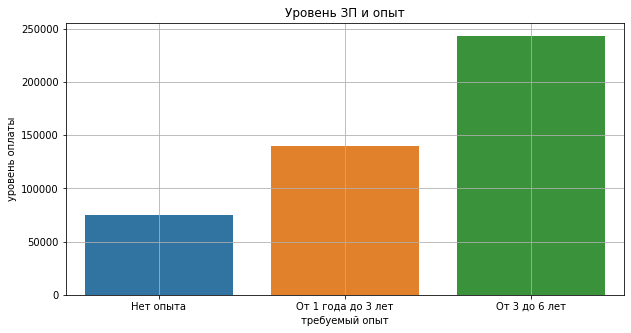

In [290]:
money = pd.read_sql_query(query_6_6, connection)
display(money)

fig = plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    data=money,
    x='expa',
    y='money'
)
barplot.set_title('Уровень ЗП и опыт');
barplot.set_xlabel('требуемый опыт');
barplot.set_ylabel('уровень оплаты');
barplot.grid()

***

>выводы по предметному анализу

Как-то не густо вакансий по DS в базе, но зарплаты в среднем на уровне и можно удваивать раз в 3 года.

# Общий вывод по проекту

>подведем итог исследования, обобщите выводы

Запросы SQL несомненно полезный навык для data science, который позволяет вам не только доставать информацию из баз данных в нужном виде но и проводить её анализ.
Посмотрим где это еще может пригодится...


In [281]:
query_7_1 = f'''SELECT 
                    COUNT(vacancies.id) AS jun_am
                FROM 
                    public.vacancies AS vacancies
                WHERE 
                    LOWER(vacancies.name) LIKE ANY(ARRAY['%1с%'])
                    AND
                    LOWER(vacancies.name) LIKE ANY(ARRAY['%программист%', '%разработчик%'])
                    AND
                    (LOWER(vacancies.name) LIKE '%junior%'
                        OR LOWER(vacancies.experience) LIKE '%нет опыта%'
                        OR LOWER(vacancies.schedule) LIKE '%стажировка%')
'''

In [279]:
vac_am = pd.read_sql_query(query_7_1, connection)
display(vac_am)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,jun_am
0,328


In [284]:
query_7_2 = f'''SELECT
                    vacancies.experience AS expa,
                    ROUND(AVG((COALESCE(vacancies.salary_from, vacancies.salary_to, 0) + COALESCE(vacancies.salary_to, vacancies.salary_from, 0))::numeric / 2)) AS money
                FROM 
                    public.vacancies AS vacancies
                WHERE 
                    LOWER(vacancies.name) LIKE ANY(ARRAY['%1с%'])
                    AND
                    LOWER(vacancies.name) LIKE ANY(ARRAY['%программист%', '%разработчик%'])
                    AND (vacancies.salary_from IS NOT NULL
                            OR vacancies.salary_to IS NOT NULL)
                GROUP BY
                    vacancies.experience
                ORDER BY
                    money
'''

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,expa,money
0,Нет опыта,53115.0
1,От 1 года до 3 лет,99880.0
2,От 3 до 6 лет,129038.0
3,Более 6 лет,162093.0


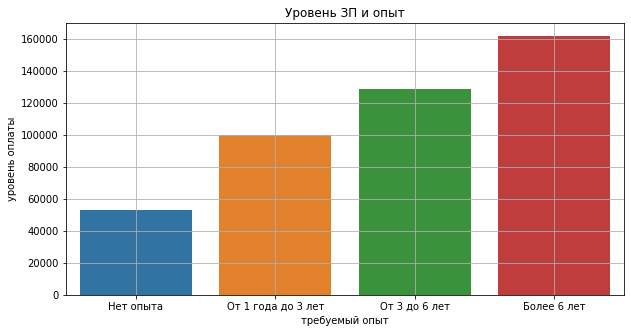

In [291]:
money = pd.read_sql_query(query_7_2, connection)
display(money)

fig = plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    data=money,
    x='expa',
    y='money'
)
barplot.set_title('Уровень ЗП и опыт');
barplot.set_xlabel('требуемый опыт');
barplot.set_ylabel('уровень оплаты');
barplot.grid()

Как ни странно, но можно посмотреть в сторону разработки на 1С, там умение писать запросы вам точно понадобится ежедневно, только они будут на русском)
Из плюсов в 6,5 раз больше предложений для новичков
Из минусов поменьше зарплата и вас будут считать не настоящим айтишником) 

In [292]:
connection.close()